**Define the necessary libraries**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
import random

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, Normalizer


**Load the dataset into the dataframe**

In [12]:
data=pd.read_csv('BigmartSales.csv')
df=pd.DataFrame(data)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Drop the "Item_Identifier" and "Outlet_Identifier" columns**

In [13]:
columns_to_drop=["Item_Identifier","Outlet_Identifier"]
df=df.drop(columns_to_drop,axis=1)
#print(df.head())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


**Extract the target labels**

In [14]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

**Replace the field "Item_Fat_Content" with numerical value**

In [15]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'Low Fat':'0','Regular':'1'})

**Perform ordinal encoding of the "Item_Type", "Outlet_Type", "Outlet_Location_Type" and "Outlet_Type" field**

In [16]:
#Mapping Ordinal for 'Item_Type','Outlet_Type','Outlet_Location_Type'
ordinal_encoding=['Item_Type','Outlet_Type','Outlet_Location_Type']

for i in ordinal_encoding:
    list_data=df[i].unique()
    list_data_ordinal={value:index + 1 for index, value in enumerate(list_data)}
    df[i]=df[i].map(list_data_ordinal)
    #print(list_data)




In [8]:
'''#Mapping Ordinal for "Item Type"

item_type_list=df['Item_Type'].unique()
item_list_ordinal={value:index + 1 for index, value in enumerate(item_type_list)}
df['Item_Type']=df['Item_Type'].map(item_list_ordinal)
#print(item_type_list)
#print(df['Item_Type'])

#Mapping Ordinal for "Outlet Type"

outlet_type_list=df['Outlet_Type'].unique()
outlet_type_list_ordinal={value:index + 1 for index, value in enumerate(outlet_type_list)}
df['Outlet_Type']=df['Outlet_Type'].map(outlet_type_list_ordinal)
#print(outlet_type_list)
#print(df['Outlet_Type'])

#MApping Ordinal for Outlet_Location_Type
Outlet_Location_Type_list=df['Outlet_Location_Type'].unique()
Outlet_Location_Type_list_ordinal={value:index + 1 for index, value in enumerate(Outlet_Location_Type_list)}
df['Outlet_Location_Type']=df['Outlet_Location_Type'].map(Outlet_Location_Type_list_ordinal)
#print(Outlet_Location_Type_list)
#print(df['Outlet_Location_Type'])
'''

'#Mapping Ordinal for "Item Type"\n\nitem_type_list=df[\'Item_Type\'].unique()\nitem_list_ordinal={value:index + 1 for index, value in enumerate(item_type_list)}\ndf[\'Item_Type\']=df[\'Item_Type\'].map(item_list_ordinal)\n#print(item_type_list)\n#print(df[\'Item_Type\'])\n\n#Mapping Ordinal for "Outlet Type"\n\noutlet_type_list=df[\'Outlet_Type\'].unique()\noutlet_type_list_ordinal={value:index + 1 for index, value in enumerate(outlet_type_list)}\ndf[\'Outlet_Type\']=df[\'Outlet_Type\'].map(outlet_type_list_ordinal)\n#print(outlet_type_list)\n#print(df[\'Outlet_Type\'])\n\n#MApping Ordinal for Outlet_Location_Type\nOutlet_Location_Type_list=df[\'Outlet_Location_Type\'].unique()\nOutlet_Location_Type_list_ordinal={value:index + 1 for index, value in enumerate(Outlet_Location_Type_list)}\ndf[\'Outlet_Location_Type\']=df[\'Outlet_Location_Type\'].map(Outlet_Location_Type_list_ordinal)\n#print(Outlet_Location_Type_list)\n#print(df[\'Outlet_Location_Type\'])\n'

**Imputation of "Outlet_Size" field with mode value**

In [17]:
outlet_size_mode_value = df['Outlet_Size'].mode()[0]
df['Outlet_Size'].fillna(outlet_size_mode_value, inplace=True)
#print(df['Outlet_Size'])

**Check for null values**

In [18]:
null_values=df.isnull().sum()
print(null_values)

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


**Imputation of "Item_Weight" field with mode value**

In [19]:
item_weight_mode_value=df['Item_Weight'].mode()[0]
df['Item_Weight'].fillna(item_weight_mode_value,inplace=True)
#print(df['Item_Weight'])

In [20]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,1,249.8092,1999,Medium,1,1,3735.1380
1,5.92,1,0.019278,2,48.2692,2009,Medium,2,2,443.4228
2,17.50,0,0.016760,3,141.6180,1999,Medium,1,1,2097.2700
3,19.20,1,0.000000,4,182.0950,1998,Medium,2,3,732.3800
4,8.93,0,0.000000,5,53.8614,1987,High,2,1,994.7052


**Display all field in the dataset using boxplot**

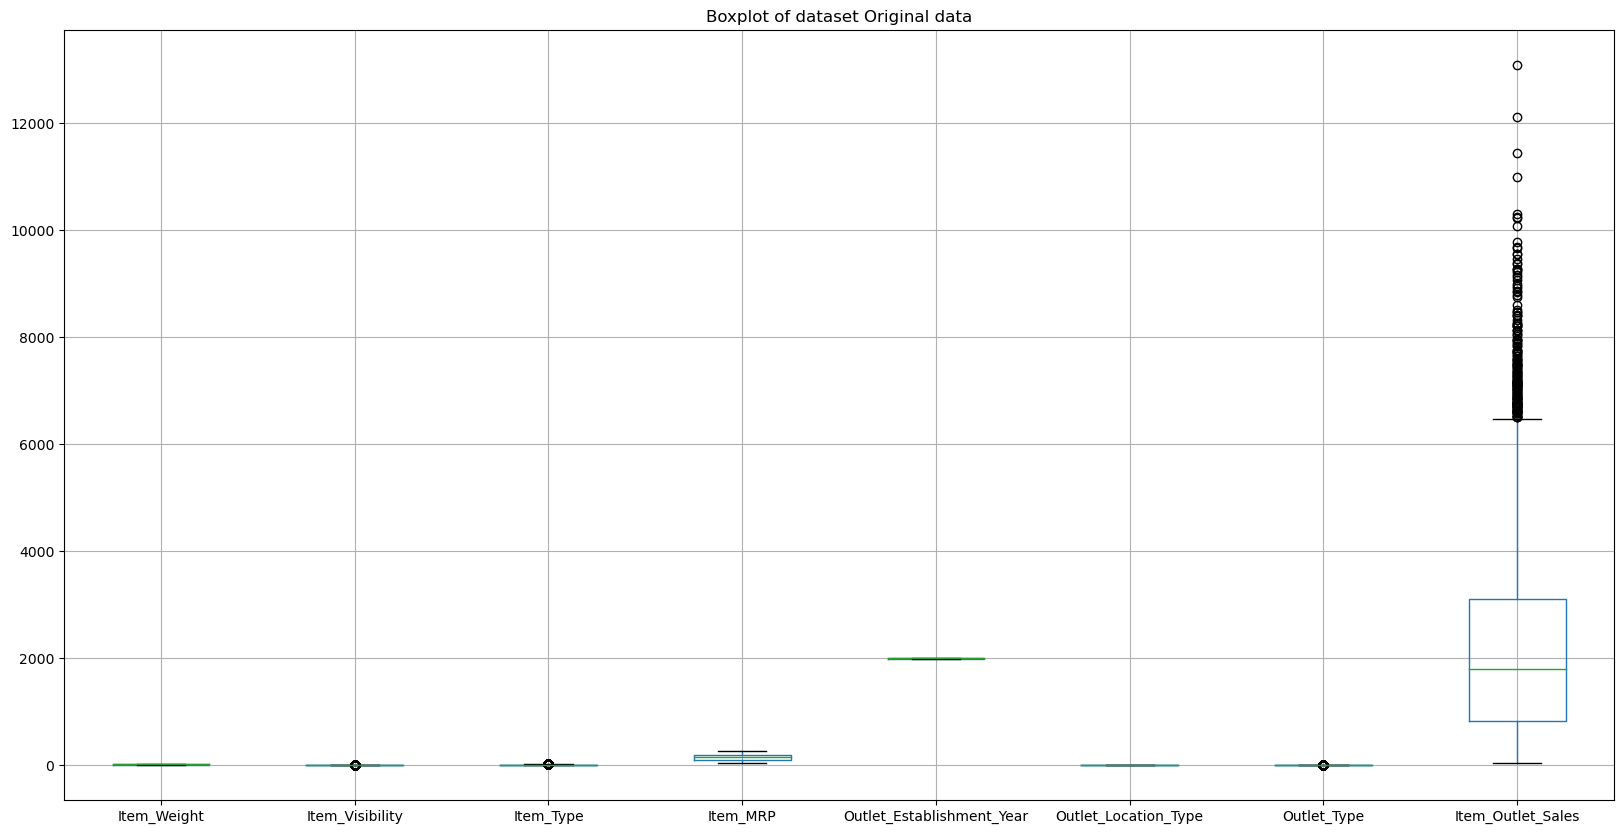

In [21]:
#numeric_columns = df.select_dtypes(include=['int', 'float']).columns
df.boxplot(figsize=(20, 10))
plt.title("Boxplot of dataset Original data")
plt.show()

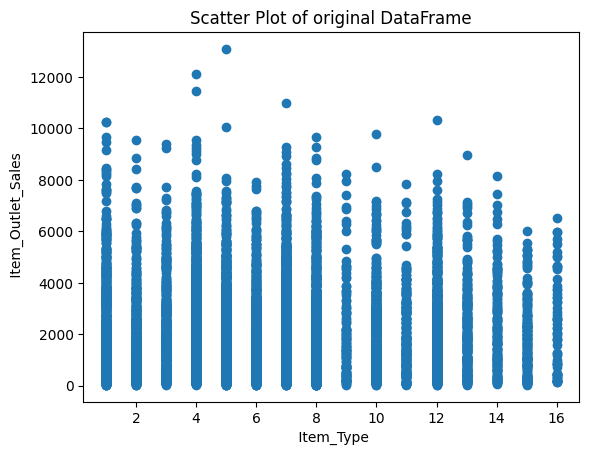

In [14]:
#Scatter plot
plt.scatter(df['Item_Type'], df['Item_Outlet_Sales'])
plt.title('Scatter Plot of original DataFrame')
plt.xlabel(' Item_Type')
plt.ylabel(' Item_Outlet_Sales')
plt.show()

In [39]:
#numeric_columns = df.select_dtypes(include=['int', 'float']).columns
X = df[['Item_Weight', 'Item_Visibility', 'Item_Type', 
                        'Item_MRP', 
                        'Outlet_Location_Type', 'Outlet_Type']]
y = df[['Item_Outlet_Sales']]

print("\nX Variables :",X.columns)
print("\ny variable  :",y.columns)


X Variables : Index(['Item_Weight', 'Item_Visibility', 'Item_Type', 'Item_MRP',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

y variable  : Index(['Item_Outlet_Sales'], dtype='object')


**Split the dataset into train and test(20%), apply Linear Regression and calculate RMSE value**

In [40]:
# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##shape of test and train
print("\nX_train shape :",X_train.shape)
print("y_train shape :",y_train.shape)

print("\nX_test shape  :",X_test.shape)
print("y_test shape  :",y_test.shape)


# Applying Linear Regression
model = LinearRegression()
X_y_train=model.fit(X_train, y_train)

print("\nModel Name:",model,'\n')
print("Features of X_train, y_train is : "+model.feature_names_in_)

# Making predictions on the test set
y_pred = model.predict(X_test)
print("\ny_pred shape : ",y_pred.shape)

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Displaying the RMSE value
print("\nRoot Mean Squared Error (RMSE) Linear Regression :", rmse)


X_train shape : (6818, 6)
y_train shape : (6818, 1)

X_test shape  : (1705, 6)
y_test shape  : (1705, 1)

Model Name: LinearRegression() 

['Features of X_train, y_train is : Item_Weight'
 'Features of X_train, y_train is : Item_Visibility'
 'Features of X_train, y_train is : Item_Type'
 'Features of X_train, y_train is : Item_MRP'
 'Features of X_train, y_train is : Outlet_Location_Type'
 'Features of X_train, y_train is : Outlet_Type']

y_pred shape :  (1705, 1)

Root Mean Squared Error (RMSE) Linear Regression : 1330.3770710699025


**Apply StandardScaller and split the dataset into train and test(20%)**

In [41]:
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Split the dataset into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)



**Display all field in the dataset using boxplot**

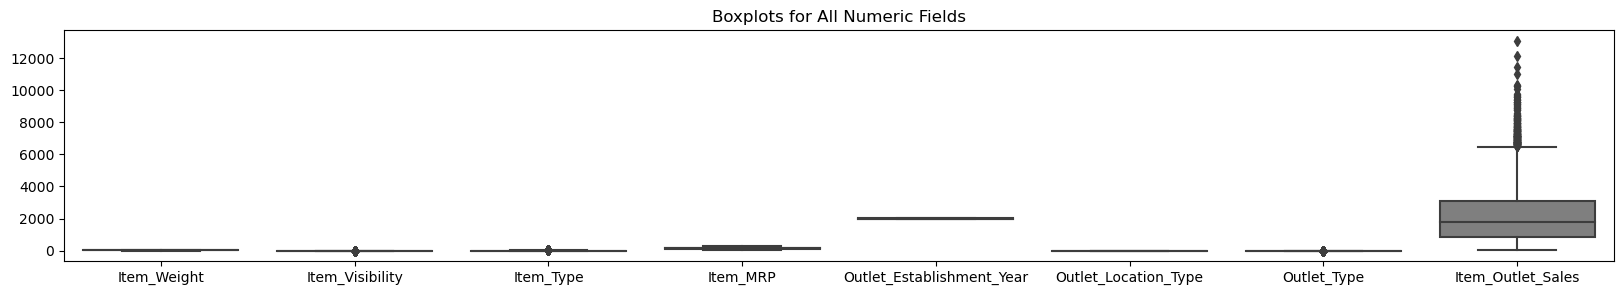

In [42]:
# Display boxplots for all numeric fields
plt.figure(figsize=(20, 3))
sns.boxplot(data=df, orient='v')
plt.title('Boxplots for All Numeric Fields')
plt.show()

**Apply Linear Regression and calculate RMSE value**

In [43]:
# Apply Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate RMSE
standard_scaler_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) StandardScaller using Linear Regression: {standard_scaler_rmse}')

Root Mean Squared Error (RMSE) StandardScaller using Linear Regression: 1330.3770710699025


In [44]:
rmse_data={}

**Apply MinMaxScaler, split the dataset into train and test(20%), apply LinearRegression and calculate RMSE**

In [45]:
from sklearn.preprocessing import MinMaxScaler

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_data[str(scaler)]=rmse
print(f'Root Mean Squared Error (RMSE) MinMaxScaler: {rmse}')


Root Mean Squared Error (RMSE) MinMaxScaler: 1330.3770710699023


**Apply RobustScaler,Split the dataset into train and test(20%), apply LinearRegression and calculate RMSE**

In [46]:
from sklearn.preprocessing import RobustScaler

# Apply RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_data[str(scaler)]=rmse
print(f'Root Mean Squared Error (RMSE) RobustScaler: {rmse}')

Root Mean Squared Error (RMSE) RobustScaler: 1330.3770710699025


**Apply MaxAbsScaler, split the dataset into train and test(20%), apply LinearRegression and calculate RMSE**

In [47]:
from sklearn.preprocessing import MaxAbsScaler

# Apply MaxAbsScaler
scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_data[str(scaler)]=rmse
print(f'Root Mean Squared Error (RMSE) RobustScaler: {rmse}')

Root Mean Squared Error (RMSE) RobustScaler: 1330.3770710699025


**Apply Normalizer, split the dataset into train and test(20%), apply LinearRegression and calculate RMSE**

In [48]:
from sklearn.preprocessing import Normalizer

# Apply Normalizer
normalizer = Normalizer()
X_normalized = normalizer.fit_transform(X)

# Split the dataset into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Apply Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_data[str(normalizer)]=rmse
print(f'Root Mean Squared Error (RMSE) Normalizer: {rmse}')

Root Mean Squared Error (RMSE) Normalizer: 1433.2135040375158


**Define a function valuelabel to place the legend of each bar in the histogram**

In [49]:
def valuelabel(ax):
    # Function to add value labels on top of each bar in a histogram
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
      

**Plot a histogram to display the RMSE value of each scaler**

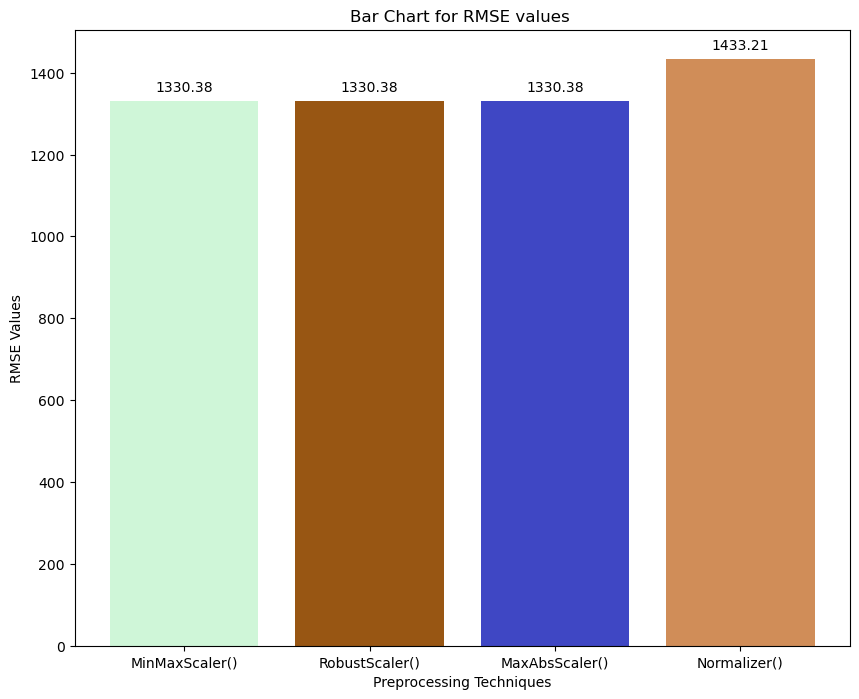

In [50]:
# Import necessary libraries
import matplotlib.pyplot as plt
import random

# Assuming rmse_data is a dictionary containing RMSE values for different scalers
# Example: rmse_data = {'StandardScaler': 0.123, 'MinMaxScaler': 0.456, 'RobustScaler': 0.789}

# Generate random colors for each bar
colors = [f'#{random.randint(0, 0xFFFFFF):06x}' for _ in rmse_data]

# Plotting a bar chart
fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.bar(rmse_data.keys(), rmse_data.values(), color=colors)
ax.set_xlabel('Preprocessing Techniques')
ax.set_ylabel('RMSE Values')
ax.set_title('Bar Chart for RMSE values ')

# Call the valuelabel function to add value labels on top of each bar
valuelabel(ax)

# Display the plot
plt.show()
